In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl
import re

In [2]:
df=pd.read_csv("cuentas_credicel.csv",encoding="latin")

C:\Users\andre\AppData\Local\Temp\ipykernel_7640\1835407192.py:1: DtypeWarning: Columns (26,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("cuentas_credicel.csv",encoding="latin")


In [3]:
print(df.isnull().sum())

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                  13
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago      3356
fecha_pago_proximo     3356
status_cuenta          4197
puntos                 3595
riesgo                 2473
porc_enganche          2473
porc_tasa                 0
score_buro                0
razones_buro           4505
semana_actual          4505
codigo_postal           685
Unnamed: 33           21876
Unnamed: 34           22735
Unnamed: 35         

In [4]:
df["monto_accesorios"].fillna(0,inplace = True)


In [5]:
df["fecha_ultimo_pago"].fillna("DESCONOCIDO",inplace = True)

In [6]:
df["fecha_pago_proximo"].fillna("DESCONOCIDO",inplace = True)

In [7]:
x=df["empresa"].mode()
x
df["empresa"].fillna("microtec",inplace = True)

In [8]:
cols_to_exclude = ['Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36']
dfsel = df.drop(columns=cols_to_exclude)

In [9]:
def update_status(row):
    if row['status'] == 1 and row['status_cuenta'] == 'Mora':
        return 3
    else:
        return row['status']

dfsel['status'] = dfsel.apply(update_status, axis=1)


In [10]:
def update_status_cuenta(row):
    if row['status'] == 1:
        return 'Corriente'
    elif row['status'] == 2:
        return 'Atrasado'
    elif row['status'] == 3:
        return 'Mora'
    elif row['status'] == 0:
        return 'Cancelado'
    else:
        return row['status_cuenta']

dfsel['status_cuenta'] = dfsel.apply(update_status_cuenta, axis=1)

In [11]:
dfsel["status_cuenta"].fillna("DESCONOCIDO",inplace = True)

In [12]:
dfsel['riesgo'] = dfsel['riesgo'].replace('Cancelado', 0)
dfsel['riesgo'] = dfsel['riesgo'].replace('Fraude', 0)
dfsel['riesgo'] = dfsel['riesgo'].replace('Atraso', 0)
dfsel['riesgo'] = pd.to_numeric(dfsel['riesgo'])


In [13]:
def categorize_riesgo(val):
    if pd.isna(val):
        return None
    if val == -100:
        return 'No hay riesgo'
    elif -99 <= val <= -52:
        return 'Riesgo minimo'
    elif -51 <= val <= -1:
        return 'Hay poco riesgo'
    elif val == 0:
        return 'Hay riesgo'
    elif 1 <= val <= 51:
        return 'Riesgo considerable'
    elif 52 <= val <= 99:
        return 'Riesgo Alto'
    elif val == 100:
        return 'Riesgo Enorme'

dfsel['riesgo_categorizado'] = dfsel['riesgo'].apply(categorize_riesgo)

In [14]:
dfsel["riesgo"].fillna("No Hay Datos",inplace = True)

In [15]:
dfsel["puntos"].fillna(0,inplace = True)

In [16]:
dfsel["porc_enganche"].fillna(0,inplace = True)

In [17]:
dfsel["razones_buro"].fillna(0,inplace = True)

In [18]:
dfsel["semana_actual"].fillna(0,inplace = True)

In [19]:
dfsel["codigo_postal"].fillna(0,inplace = True)

In [20]:
dfsel["riesgo_categorizado"].fillna("Hay riesgo",inplace = True)

In [21]:
print(dfsel.isnull().sum())

folio                  0
tag                    0
folio_solicitud        0
fecha                  0
marca                  0
modelo                 0
plazo                  0
precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
agente_venta           0
dis_venta              0
status                 0
fraude                 0
empresa                0
inversion              0
pagos_realizados       0
reautorizacion         0
fecha_ultimo_pago      0
fecha_pago_proximo     0
status_cuenta          0
puntos                 0
riesgo                 0
porc_enganche          0
porc_tasa              0
score_buro             0
razones_buro           0
semana_actual          0
codigo_postal          0
riesgo_categorizado    0
dtype: int64


In [22]:
dfsel['plazo'] = dfsel['plazo'].str.extract('(\d+)').astype(int)

In [23]:
num_df = dfsel[['plazo', 'precio', 'enganche', 'descuento', 'semana', 'monto_financiado', 'costo_total', 'monto_accesorios', 'status', 'fraude', 'inversion', 'pagos_realizados', 'reautorizacion', 'puntos', 'porc_enganche', 'porc_tasa', 'score_buro']]


In [24]:
cat_df = dfsel.drop(columns=['plazo', 'precio', 'enganche', 'descuento', 'semana', 'monto_financiado', 'costo_total', 'monto_accesorios', 'status', 'fraude', 'inversion', 'pagos_realizados', 'reautorizacion', 'puntos', 'porc_enganche', 'porc_tasa', 'score_buro'])


<Axes: >

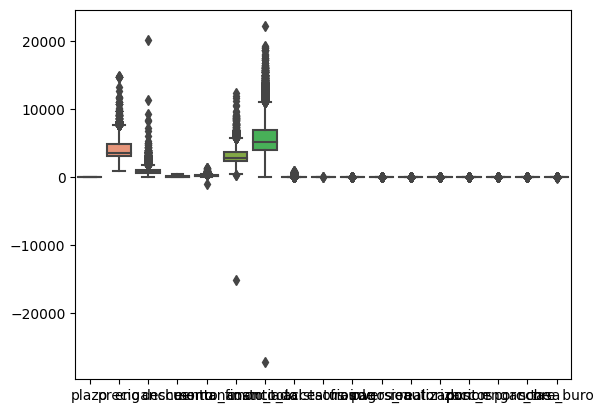

In [25]:
sns.boxplot(data=num_df)

In [26]:
y = num_df
percentile20 = y.quantile(0.20)
percentile90 = y.quantile(0.90)
iqr = percentile90 - percentile20
lower_bound = percentile20 - (1.5 * iqr)
upper_bound = percentile90 + (1.5 * iqr)
cleaned_data = num_df[(num_df >= lower_bound) & (num_df <= upper_bound)]

print(cleaned_data)

       plazo  precio  enganche  descuento  semana  monto_financiado  \
0         26  1949.0     780.0        0.0    81.0            1169.0   
1         13  2999.0    1050.0        0.0   225.0            1949.0   
2         13  1959.0     490.0        0.0   170.0            1469.0   
3         13  1959.0     490.0        0.0   170.0            1469.0   
4         39  4299.0    1075.0        0.0   178.0            3224.0   
...      ...     ...       ...        ...     ...               ...   
22730     26  3349.0     297.0        0.0   211.0            3052.0   
22731     26  4100.0    1209.0        0.0   200.0            2891.0   
22732     26  4849.0    1152.0        0.0   256.0            3697.0   
22733     39  9799.0       NaN        0.0   386.0            7000.0   
22734     26  5399.0    1086.0        0.0   299.0            4313.0   

       costo_total  monto_accesorios  status  fraude  inversion  \
0           2106.0               0.0     2.0     0.0        0.0   
1           2

<Axes: >

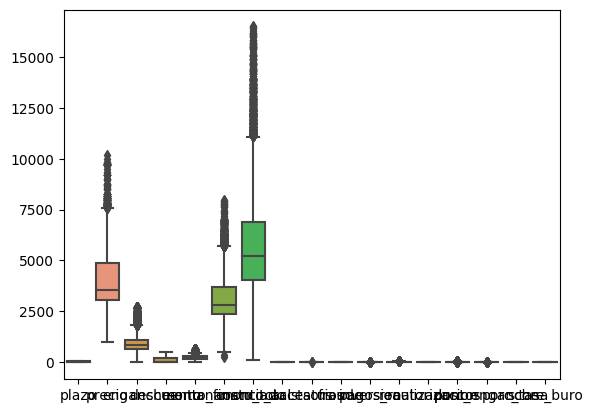

In [27]:
sns.boxplot(data=cleaned_data)

In [28]:
print(cleaned_data.isnull().sum())

10096


In [29]:
x=round(cleaned_data["precio"].mean(),1)
print(x)
cleaned_data["precio"].fillna(x,inplace = True)
y=round(cleaned_data["enganche"].mean(),1)
print(y)
cleaned_data["enganche"].fillna(y,inplace = True)
z=round(cleaned_data["semana"].mean(),1)
print(z)
cleaned_data["semana"].fillna(z,inplace = True)

3987.6
907.4
235.9


In [30]:
x=round(cleaned_data["monto_financiado"].mean(),1)
print(x)
cleaned_data["monto_financiado"].fillna(x,inplace = True)
y=round(cleaned_data["costo_total"].mean(),1)
print(y)
cleaned_data["costo_total"].fillna(y,inplace = True)
z=round(cleaned_data["monto_accesorios"].mean(),1)
print(z)
cleaned_data["monto_accesorios"].fillna(z,inplace = True)

3069.5
5688.5
0.0


In [31]:
x=round(cleaned_data["status"].mean(),1)
print(x)
cleaned_data["status"].fillna(x,inplace = True)
y=round(cleaned_data["fraude"].mean(),1)
print(y)
cleaned_data["fraude"].fillna(y,inplace = True)
z=round(cleaned_data["inversion"].mean(),1)
print(z)
cleaned_data["inversion"].fillna(z,inplace = True)

1.7
0.0
0.2


In [32]:
x=round(cleaned_data["pagos_realizados"].mean(),1)
print(x)
cleaned_data["pagos_realizados"].fillna(x,inplace = True)
y=round(cleaned_data["reautorizacion"].mean(),1)
print(y)
cleaned_data["reautorizacion"].fillna(y,inplace = True)
z=round(cleaned_data["puntos"].mean(),1)
print(z)
cleaned_data["puntos"].fillna(z,inplace = True)

10.2
0.0
11.9


In [33]:
x=round(cleaned_data["porc_enganche"].mean(),1)
print(x)
cleaned_data["porc_enganche"].fillna(x,inplace = True)
y=round(cleaned_data["porc_tasa"].mean(),1)
print(y)
cleaned_data["porc_tasa"].fillna(y,inplace = True)
z=round(cleaned_data["score_buro"].mean(),1)
print(z)
cleaned_data["score_buro"].fillna(z,inplace = True)

0.1
0.0
0.0


In [34]:
print(cleaned_data.isnull().sum())

plazo               0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
porc_enganche       0
porc_tasa           0
score_buro          0
dtype: int64


In [35]:
Df_colo = pd.concat([cleaned_data, cat_df], axis=1)

In [36]:
Df_colo.to_csv("Credicel_Limpio3.csv")